# K-Nearest Neighbors 

Outliers are points that are far away from their neighbors in the feature space. The KNN outlier score measures how isolated a point is from its k closest neighbors.

``` Normal data points exist in dense neighborhoods, while outliers exist in sparse regions.```

#### The Algorithm:

For each point, find its k-nearest neighbors

Calculate the distance to these neighbors

Use these distances to compute an outlier score

Points with high scores are potential outliers

### Types of KNN Outlier Scores
- 1. Distance to k-th Nearest Neighbor

 ``` Score(x) = distance(x, k-th nearest neighbor) ```
- 2. Average Distance to k Nearest Neighbors

``` Score(x) = (1/k) × Σ distance(x, neighbor_i) ```
- 3. Local Outlier Factor (LOF) - Advanced KNN
``` Compares local density of a point with densities of its neighbors```

More sophisticated than simple distance measures

### Step-by-Step Example
```bash
Let's use a simple 2D dataset:

Dataset:

text
A: [1, 1]
B: [1, 2] 
C: [2, 1]
D: [2, 2]
E: [8, 8]  ← Potential outlier
Using k=2, Euclidean distance:
```

```bash
Step 1: Calculate Distance Matrix


Distances:
A-B: 1.00, A-C: 1.00, A-D: 1.41, A-E: 9.90
B-A: 1.00, B-C: 1.41, B-D: 1.00, B-E: 9.22
C-A: 1.00, C-B: 1.41, C-D: 1.00, C-E: 9.22
D-A: 1.41, D-B: 1.00, D-C: 1.00, D-E: 8.49
E-A: 9.90, E-B: 9.22, E-C: 9.22, E-D: 8.49
Step 2: Find k=2 Nearest Neighbors for Each Point


A: Nearest neighbors = B(1.00), C(1.00) → 2nd distance = 1.00
B: Nearest neighbors = A(1.00), D(1.00) → 2nd distance = 1.00  
C: Nearest neighbors = A(1.00), D(1.00) → 2nd distance = 1.00
D: Nearest neighbors = B(1.00), C(1.00) → 2nd distance = 1.00
E: Nearest neighbors = D(8.49), C(9.22) → 2nd distance = 9.22
Step 3: Calculate Outlier Scores (k-th distance)


A: 1.00
B: 1.00
C: 1.00  
D: 1.00
E: 9.22  ← Clearly an outlier!
Mathematical Formulation
1. k-th Distance Method

Let Nₖ(x) be the k-th nearest neighbor of x
Score(x) = d(x, Nₖ(x))
2. Average k-NN Distance

Score(x) = (1/k) × Σᵢ d(x, Nᵢ(x)) for i=1 to k
3. Local Outlier Factor (LOF)

Reachability distance: reach-distₖ(A,B) = max(dₖ(B), d(A,B))
Local reachability density: lrdₖ(A) = 1 / (avg reach-distₖ(A, Nₖ(A)))
LOFₖ(A) = avg(lrdₖ(B) / lrdₖ(A)) for B in Nₖ(A)
When to Use KNN Outlier Detection
Excellent for:

Multivariate data with complex relationships

Clustered data where density varies

Non-linear patterns that linear methods miss

No distribution assumptions needed
```
### Advantages:

 No distribution assumptions

 Works with any distance metric

 Intuitive - based on geometric proximity

 Handles complex patterns

 Multivariate capability

#### Limitations:

 Computationally expensive for large datasets

 Sensitive to choice of k

 Curse of dimensionality in high-dimensional spaces

 Distance metric choice affects results

Choosing the Right k Value
Small k (2-5):

More sensitive to local variations

Better for detecting small, isolated outliers

Risk of false positives in sparse regions

Large k (10-20):

More global perspective

Better for detecting global outliers

May miss local anomalies

- Distance Metrics
#### Euclidean Distance (L2):

``` distance = sqrt(Σ(x_i - y_i)²) ```
Most common, works well for continuous features

#### Manhattan Distance (L1):


``` distance = Σ|x_i - y_i|```
More robust to outliers in individual dimensions

Cosine Similarity:

For text data or high-dimensional sparse data

=== Example 1: Simple 2D Dataset ===
Top 10 outlier candidates by k-th distance:
             x         y  kth_score  is_outlier
101  10.000000 -5.000000   9.778976        True
100   8.000000  8.000000   9.709372        True
102  -7.000000  9.000000   9.621645        True
103   6.000000 -8.000000   8.419877        True
37   -2.619745  0.821903   1.437980       False
89   -0.264657  2.720169   1.296711       False
56    0.060230  2.463242   0.949342       False
53    1.886186  0.174578   0.941237       False
78    1.865775  0.473833   0.904461       False
15   -0.601707  1.852278   0.900798       False

Top 10 outlier candidates by average distance:
             x         y  avg_score  is_outlier
100   8.000000  8.000000   9.580139        True
102  -7.000000  9.000000   9.463459        True
101  10.000000 -5.000000   8.670182        True
103   6.000000 -8.000000   7.641666        True
37   -2.619745  0.821903   1.295473       False
89   -0.264657  2.720169   0.964550       False
56    0

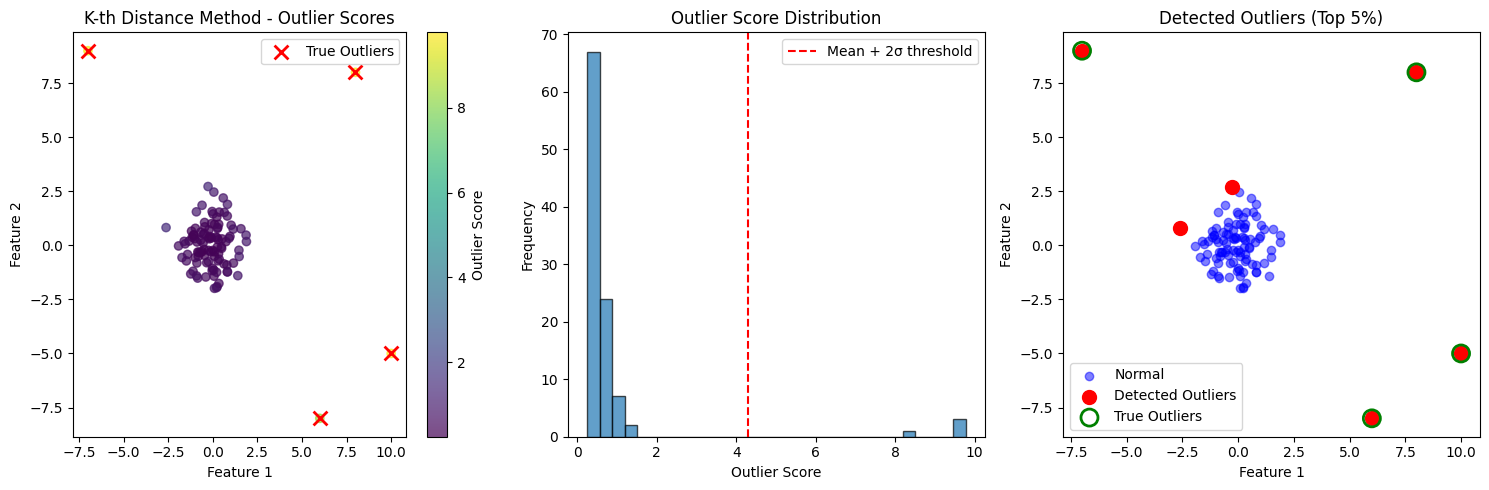


=== Local Outlier Factor (LOF) Comparison ===
Comparison of different KNN-based methods:
Top outliers by each method:

K-th Distance method:
             x         y  kth_score  true_outlier
101  10.000000 -5.000000   9.778976          True
100   8.000000  8.000000   9.709372          True
102  -7.000000  9.000000   9.621645          True
103   6.000000 -8.000000   8.419877          True
37   -2.619745  0.821903   1.437980         False

Average Distance method:
             x         y  avg_score  true_outlier
100   8.000000  8.000000   9.580139          True
102  -7.000000  9.000000   9.463459          True
101  10.000000 -5.000000   8.670182          True
103   6.000000 -8.000000   7.641666          True
37   -2.619745  0.821903   1.295473         False

LOF method:
             x         y  lof_score  true_outlier
102  -7.000000  9.000000  11.849798          True
100   8.000000  8.000000   9.988305          True
101  10.000000 -5.000000   9.543948          True
103   6.000000 -8.0

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def knn_outlier_score_simple(X, k=5, metric='euclidean'):
    """
    Simple KNN outlier detection using k-th distance
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric)  # +1 to include self
    nbrs.fit(X)
    
    # distances[0] is the point itself, distances[1] is the first neighbor, etc.
    distances, indices = nbrs.kneighbors(X)
    
    # Use distance to k-th neighbor (index k since 0 is self)
    outlier_scores = distances[:, k]
    
    return outlier_scores, distances, indices

def knn_outlier_score_average(X, k=5, metric='euclidean'):
    """
    KNN outlier detection using average distance to k neighbors
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, metric=metric)
    nbrs.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Average distance to k nearest neighbors (excluding self)
    outlier_scores = np.mean(distances[:, 1:k+1], axis=1)
    
    return outlier_scores, distances, indices

# Example 1: Simple 2D dataset with clear outlier
print("=== Example 1: Simple 2D Dataset ===")
np.random.seed(42)

# Generate normal data points
normal_data = np.random.normal(0, 1, (100, 2))

# Add some outliers
outliers = np.array([[8, 8], [10, -5], [-7, 9], [6, -8]])

# Combine data
X = np.vstack([normal_data, outliers])

# Calculate outlier scores
kth_scores, kth_distances, kth_indices = knn_outlier_score_simple(X, k=5)
avg_scores, avg_distances, avg_indices = knn_outlier_score_average(X, k=5)

# Create results dataframe
results = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'kth_score': kth_scores,
    'avg_score': avg_scores,
    'is_outlier': np.arange(len(X)) >= len(normal_data)  # Known outliers
})

print("Top 10 outlier candidates by k-th distance:")
print(results.nlargest(10, 'kth_score')[['x', 'y', 'kth_score', 'is_outlier']])

print("\nTop 10 outlier candidates by average distance:")
print(results.nlargest(10, 'avg_score')[['x', 'y', 'avg_score', 'is_outlier']])

# Example 2: Realistic dataset - customer spending patterns
print("\n=== Example 2: Customer Spending Patterns ===")

# Simulate customer data: [age, annual_income, monthly_spending]
np.random.seed(123)
n_customers = 200

# Normal customers
ages = np.random.normal(45, 15, n_customers)
incomes = np.random.normal(75000, 20000, n_customers) 
spendings = incomes * np.random.normal(0.15, 0.05, n_customers)  # Spending ~15% of income

normal_customers = np.column_stack([ages, incomes, spendings])

# Add outliers
outlier_customers = np.array([
    [25, 200000, 5000],    # Young with high income but low spending
    [70, 30000, 10000],    # Old with low income but high spending  
    [35, 50000, 50000],    # Moderate income, extremely high spending
    [50, 1000000, 2000],   # Ultra-high income, very low spending
])

X_customers = np.vstack([normal_customers, outlier_customers])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_customers)

# Detect outliers
customer_scores, _, _ = knn_outlier_score_simple(X_scaled, k=10)

# Analyze results
customer_results = pd.DataFrame({
    'age': X_customers[:, 0],
    'income': X_customers[:, 1],
    'spending': X_customers[:, 2],
    'outlier_score': customer_scores,
    'is_actual_outlier': np.arange(len(X_customers)) >= len(normal_customers)
})

print("Detected outliers in customer data:")
detected_outliers = customer_results.nlargest(8, 'outlier_score')
print(detected_outliers[['age', 'income', 'spending', 'outlier_score', 'is_actual_outlier']])

# Calculate detection accuracy
true_positives = np.sum(detected_outliers['is_actual_outlier'])
print(f"\nDetection Performance:")
print(f"True Positives: {true_positives}/{len(outlier_customers)}")
print(f"False Positives: {len(detected_outliers) - true_positives}")

# Visualization function
def plot_knn_outliers_2d(X, scores, title, true_outliers=None):
    """
    Visualize KNN outlier detection results
    """
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Original data colored by outlier score
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', alpha=0.7)
    if true_outliers is not None:
        plt.scatter(X[true_outliers, 0], X[true_outliers, 1], 
                   c='red', marker='x', s=100, linewidth=2, label='True Outliers')
    plt.colorbar(scatter, label='Outlier Score')
    plt.title(f'{title} - Outlier Scores')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if true_outliers is not None:
        plt.legend()
    
    # Plot 2: Score distribution
    plt.subplot(1, 3, 2)
    plt.hist(scores, bins=30, alpha=0.7, edgecolor='black')
    plt.axvline(np.mean(scores) + 2*np.std(scores), color='red', 
                linestyle='--', label='Mean + 2σ threshold')
    plt.title('Outlier Score Distribution')
    plt.xlabel('Outlier Score')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Plot 3: Top outliers highlighted
    plt.subplot(1, 3, 3)
    threshold = np.percentile(scores, 95)  # Top 5% as outliers
    outlier_mask = scores > threshold
    
    plt.scatter(X[~outlier_mask, 0], X[~outlier_mask, 1], 
                c='blue', alpha=0.5, label='Normal')
    plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], 
                c='red', s=100, label='Detected Outliers')
    if true_outliers is not None:
        plt.scatter(X[true_outliers, 0], X[true_outliers, 1], 
                   facecolors='none', edgecolors='green', s=150, 
                   linewidth=2, label='True Outliers')
    plt.title(f'Detected Outliers (Top 5%)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return outlier_mask

# Visualize the simple 2D example
true_outlier_indices = list(range(len(normal_data), len(X)))
plot_knn_outliers_2d(X, kth_scores, 'K-th Distance Method', true_outlier_indices)

# Advanced: Local Outlier Factor (LOF) implementation
from sklearn.neighbors import LocalOutlierFactor

def lof_outlier_detection(X, k=20, contamination=0.1):
    """
    Local Outlier Factor - advanced density-based outlier detection
    """
    lof = LocalOutlierFactor(n_neighbors=k, contamination=contamination)
    outlier_labels = lof.fit_predict(X)
    lof_scores = -lof.negative_outlier_factor_  # Convert to positive scores
    
    return lof_scores, outlier_labels

print("\n=== Local Outlier Factor (LOF) Comparison ===")
lof_scores, lof_labels = lof_outlier_detection(X, k=10)

# Compare methods
comparison = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'kth_score': kth_scores,
    'avg_score': avg_scores, 
    'lof_score': lof_scores,
    'true_outlier': np.arange(len(X)) >= len(normal_data)
})

print("Comparison of different KNN-based methods:")
print("Top outliers by each method:")

print("\nK-th Distance method:")
print(comparison.nlargest(5, 'kth_score')[['x', 'y', 'kth_score', 'true_outlier']])

print("\nAverage Distance method:")
print(comparison.nlargest(5, 'avg_score')[['x', 'y', 'avg_score', 'true_outlier']])

print("\nLOF method:")
print(comparison.nlargest(5, 'lof_score')[['x', 'y', 'lof_score', 'true_outlier']])

## How does KNN work for outlier detection?"

 KNN outlier detection is based on the principle that outliers are points that are distant from their neighbors in the feature space. I calculate for each point the distance to its k-nearest neighbors - either the distance to the k-th neighbor or the average distance to all k neighbors.

Points with large distances are considered outliers because they exist in sparse regions rather than dense clusters. The key advantages are that it makes no distribution assumptions and works well with multivariate data. The main considerations are choosing the right k value and dealing with computational complexity for large datasets.

For more sophisticated detection, I'd use Local Outlier Factor (LOF) which compares local densities rather than just distances.